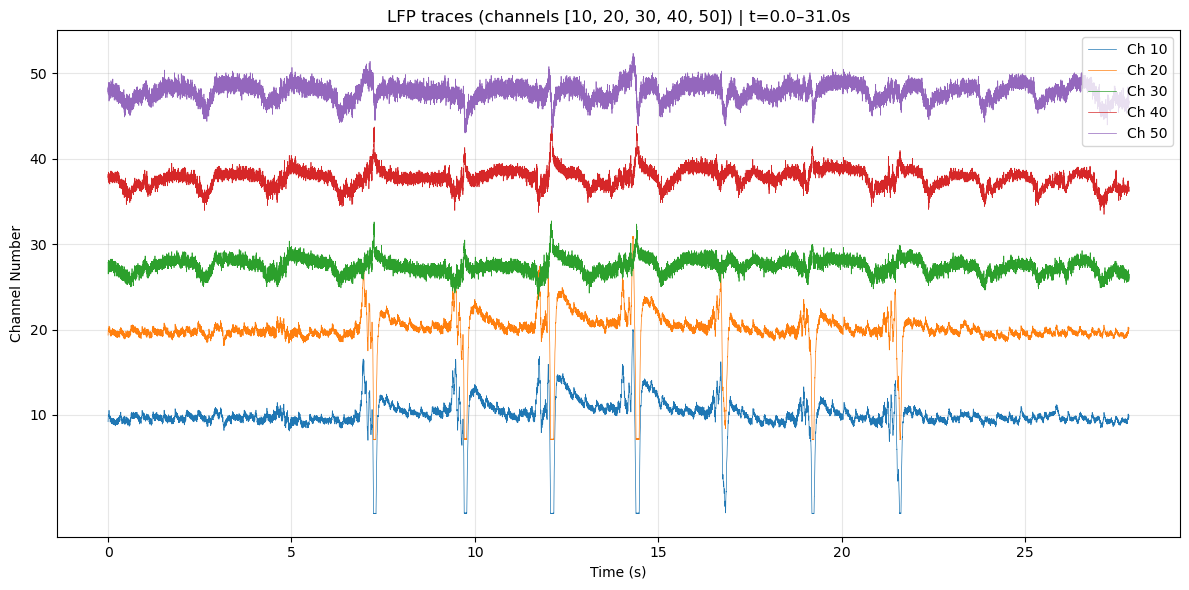

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# ENTER YOUR LFP FILE PATH
lfp_path = Path(r"E:\Neurpixels_Sally\practice3_SZMB_brush_final_2024-11-21_15-47-33\Record Node 118\experiment1\recording1\continuous\Neuropix-PXI-117.ProbeA-LFP\continuous.dat")


# ---- Parameters ----
fs_lfp     = 2500.0          # Hz (Neuropixels LFP default)
n_channels = 384             # total channels
t_start    = 0.0            # seconds to start viewing
t_window   = 31.0             # duration (seconds)
channels_to_plot = [10, 20, 30, 40, 50]  # specific channels
wiggle_amp = 0.5             # how tall the traces appear
line_w     = 0.5             # thicker lines for clarity

# ---- Load a small chunk of data ----
dtype = np.int16
samples_start = int(t_start * fs_lfp)
n_samples     = int(t_window * fs_lfp)
byte_offset   = samples_start * n_channels * np.dtype(dtype).itemsize

mm = np.memmap(lfp_path, dtype=dtype, mode='r', offset=byte_offset)
chunk = mm[: n_samples * n_channels].reshape(-1, n_channels)
time  = np.arange(chunk.shape[0]) / fs_lfp

# ---- Plot only selected channels ----
plt.figure(figsize=(12, 6))

for i, ch in enumerate(channels_to_plot):
    x = chunk[:, ch].astype(float)
    s = np.percentile(np.abs(x), 95)  # normalise amplitude
    if s == 0:
        s = 1.0
    # centre each trace on a distinct y level, one per channel
    y = i * wiggle_amp + (x / s) * 0.2
    plt.plot(time, y, linewidth=line_w, label=f"Ch {ch}")

# ---- Plot Settings ----
plt.xlabel("Time (s)")
plt.ylabel("Channel Number")
plt.title(f"LFP traces (channels {channels_to_plot}) | t={t_start:.1f}–{t_start+t_window:.1f}s")
plt.yticks([i * wiggle_amp for i in range(len(channels_to_plot))], channels_to_plot)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


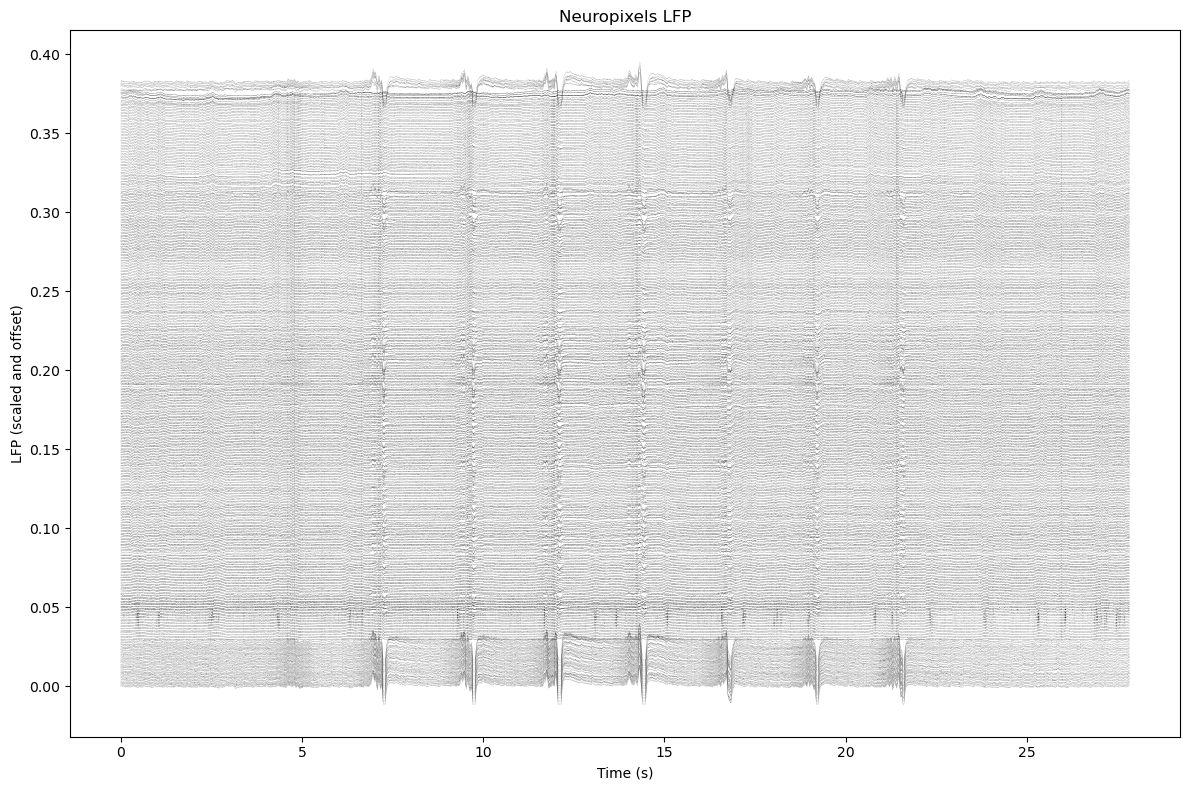

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# ENTER LFP FILE PATH HERE 
lfp_path = Path(r"E:\Neurpixels_Sally\practice3_SZMB_brush_final_2024-11-21_15-47-33\Record Node 118\experiment1\recording1\continuous\Neuropix-PXI-117.ProbeA-LFP\continuous.dat")


# Parameters for loading
fs_lfp = 2500.0     # LFP sampling rate (Hz)
dtype = np.int16    # LFP data stored as 16-bit integers
n_channels = 384    # Neuropixels v1.0 LFP channel count (384)
t_start = 0        # start time in seconds to plot
t_window = 30        # duration (seconds) to load

# Load the LFP data (short chunk for speed)
samples_start = int(t_start * fs_lfp)
n_samples = int(t_window * fs_lfp)

# Byte offset for mmap
byte_offset = samples_start * n_channels * np.dtype(dtype).itemsize

# Memory map the data — no 'with' block
mm = np.memmap(lfp_path, dtype=dtype, mode='r', offset=byte_offset)
data = mm[:n_samples * n_channels]
data = data.reshape(-1, n_channels)  # shape: (time, channels)

# Pick a few example channels (or all) to plot
channels_to_plot = list(range(0, 384))  # currently set to all channels 
time = np.arange(data.shape[0]) / fs_lfp

offset_step = 0.001                       # vertical offset between traces
line_width = 0.05                          # thin lines for clarity

plt.figure(figsize=(12, 8))
for idx, ch in enumerate(channels_to_plot):
    plt.plot(time, data[:, ch] * 1e-6 + idx * offset_step, color='black', linewidth=line_width)

plt.xlabel("Time (s)")
plt.ylabel("LFP (scaled and offset)")
plt.title("Neuropixels LFP")
plt.tight_layout()
plt.show() 